In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import copy
from scipy.stats import ttest_ind, mannwhitneyu

In [90]:
def preprocessingI(df: pd.DataFrame):
    df['category'].replace({'Кошки': 0, 'Собаки': 1}, inplace=True)
    df['has_video'].replace({'ЛОЖЬ': 0, 'ИСТИНА': 1}, inplace=True)
    df['gender'].replace({'Ж': 0, 'М': 1}, inplace=True)

    return copy(df)


file_path = 'data//avito_new_data_for_dano.xlsx'
data = pd.read_excel(file_path)
data = preprocessingI(data)

D:\Программы\Temp\Temp\ipykernel_20428\447856207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].replace({'Кошки': 0, 'Собаки': 1}, inplace=True)
D:\Программы\Temp\Temp\ipykernel_20428\447856207.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['category'].replace({'Кошки': 0

In [156]:
df = copy(data)

df['views/day'] = df['page_views'] / df['days_active']

Text(0.5, 1.0, 'Матрица корреляций до предобработки')

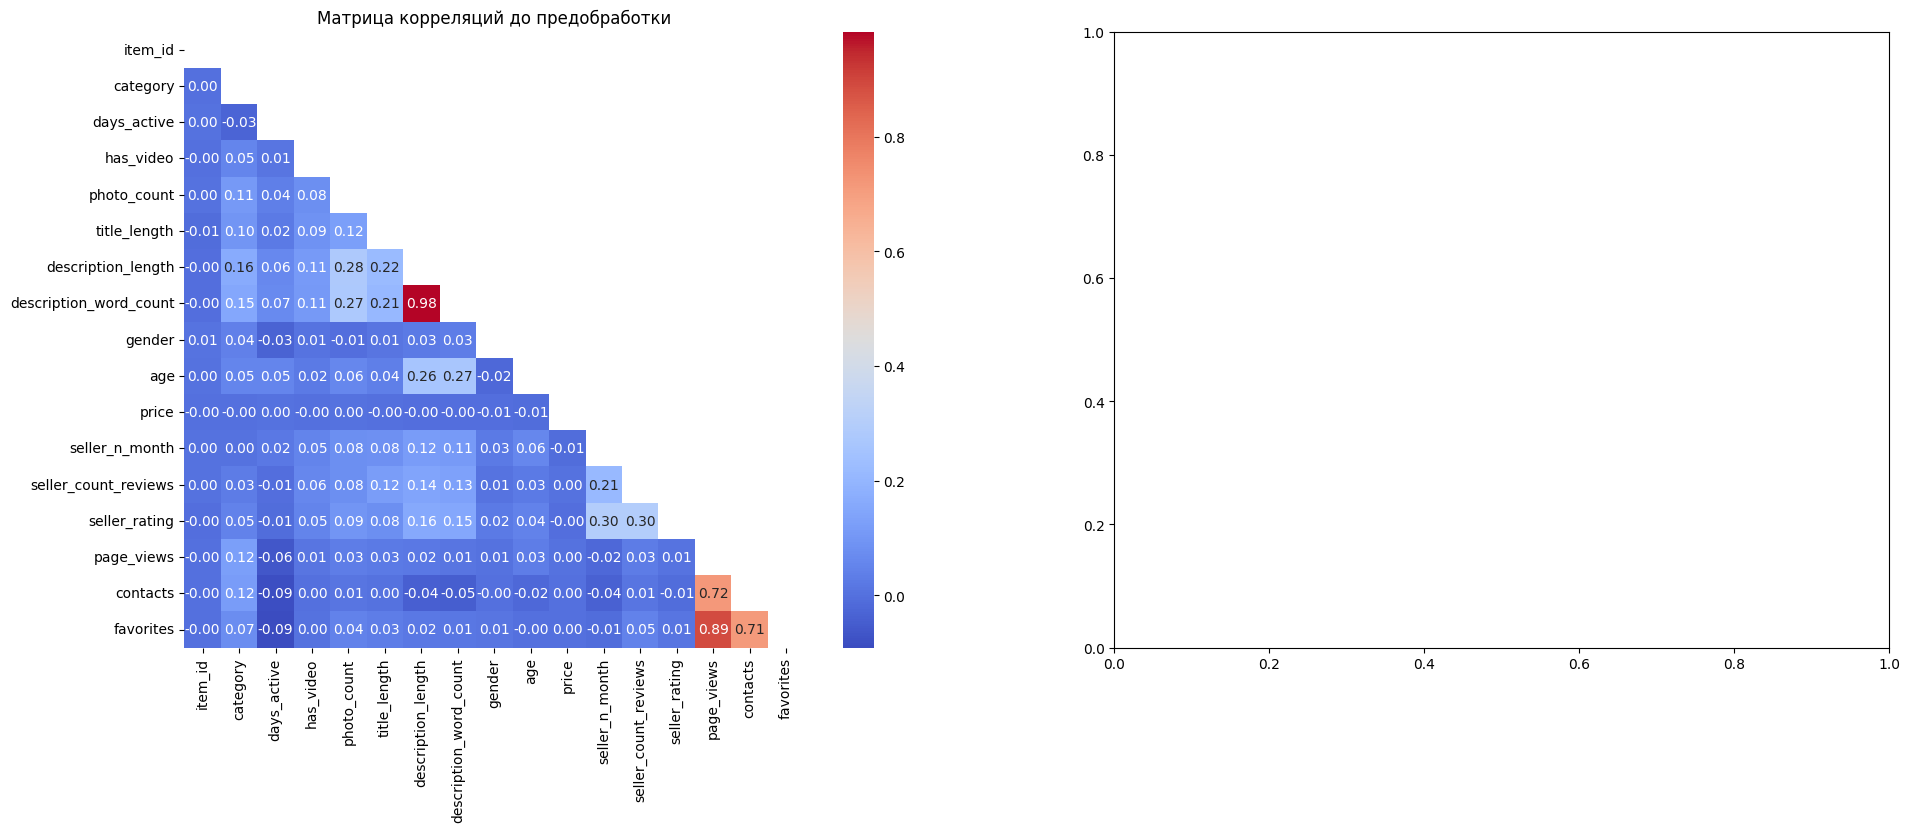

<Figure size 1000x1000 with 0 Axes>

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(22, 8))

correlation_matrixI = data.drop(columns=['title', 'DescriptionRu', 'breed']).corr()
mask = np.triu(np.ones_like(correlation_matrixI, dtype=bool))
correlation_matrixI = correlation_matrixI.mask(mask)

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrixI, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[0])
axs[0].set_title('Матрица корреляций до предобработки')

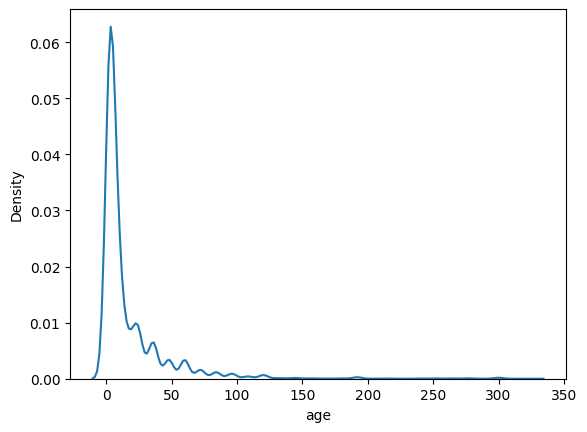

In [101]:
sns.kdeplot(df['age'])
plt.show()

D:\Программы\Temp\Temp\ipykernel_20428\2920766194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{x}_bins'] = list(map(lambda x: x.left, pd.cut(df[x], bins=20)))  # Разбиваем на интервалы


    age_bins  views/day
0      -0.02   7.640909
1       1.00   4.880000
2       2.00   3.400000
3       3.00   2.235385
4       4.00   2.000000
5       5.00   1.880000
6       6.00   1.360000
7       7.00   1.440000
8       8.00   1.211111
9       9.00   1.360000
10     10.00   1.180000
11     11.00   1.250000
12     12.00   8.500000
13     13.00  13.140000
14     14.00   2.240000
15     15.00   5.824706
16     16.00  10.440000
17     17.00   0.920000
18     18.00   6.600000
19     19.00   1.480000


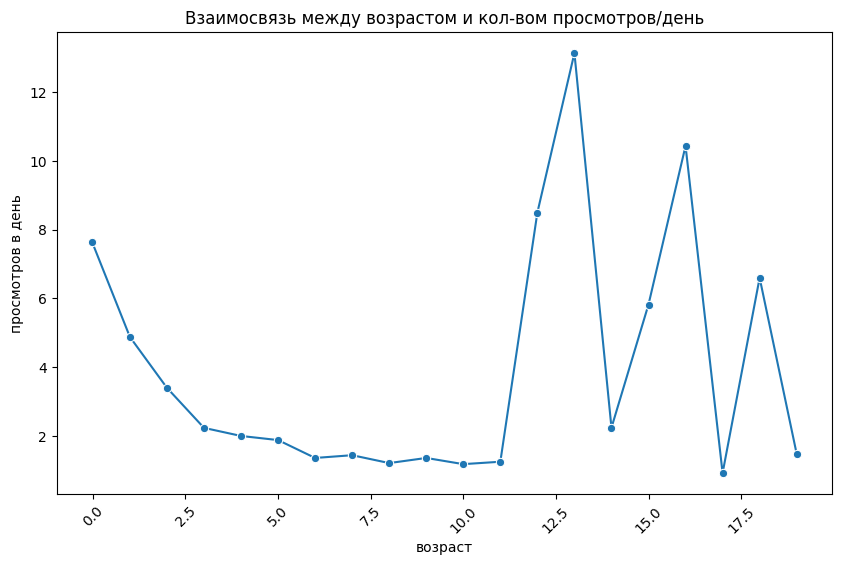

D:\Программы\Temp\Temp\ipykernel_20428\2920766194.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_line('age', 'views/day', 'Взаимосвязь между возрастом и кол-вом просмотров/день', 'возраст', 'просмотров в день', True, df=df[df['category'] == 0][df['breed'].isna()])


    age_bins  views/day
0      0.981   2.360000
1      1.950   1.880000
2      2.900   1.400000
3      3.850   1.280000
4      4.800   1.190909
5      5.750   1.239048
6      6.700   1.000000
7      7.650   0.920000
8      8.600   0.697143
9      9.550   0.760000
10    10.500   0.640000
11    11.450   0.680000
12    12.400   0.580000
13    13.350   1.260870
14    14.300   2.486667
15    15.250   0.460000
16    16.200   0.509231
17    17.150   0.822134
18    19.050   0.920000


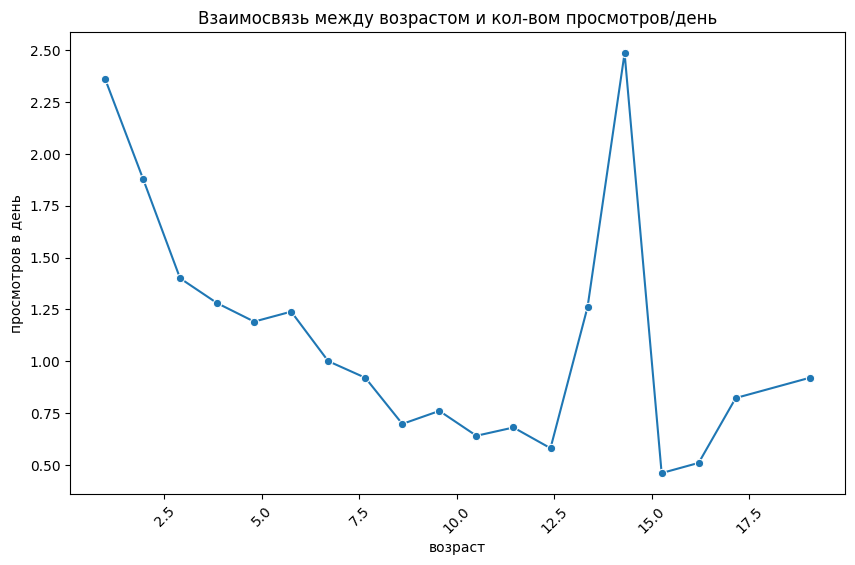

In [176]:
df['age'] = df['age'].clip(upper=20)
df = df.dropna(subset=['days_active', 'age'])
df['views/day'] = df['page_views'] / df['days_active']

def plot_line(x, y, title, xlabel, ylabel, bins=False, df=df):
    if bins:
        df[f'{x}_bins'] = list(map(lambda x: x.left, pd.cut(df[x], bins=20)))  # Разбиваем на интервалы
        median_data = df.groupby(f'{x}_bins')[y].median().reset_index()  # Группировка и расчет среднего
        print(median_data)
    else:
        median_data = df.groupby(x)[y].median().reset_index()  # Группировка и расчет медианы

    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=median_data, x=f'{x}_bins' if bins else x, y=y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
    plt.show()

plot_line('age', 'views/day', 'Взаимосвязь между возрастом и кол-вом просмотров/день', 'возраст', 'просмотров в день', True, df=df[df['category'] == 1])
plot_line('age', 'views/day', 'Взаимосвязь между возрастом и кол-вом просмотров/день', 'возраст', 'просмотров в день', True, df=df[df['category'] == 0][df['breed'].isna()])